**CURSO**: *Machine Learning* en Geociencias<br />
**Profesor**: Edier Aristizábal (evaristizabalg@unal.edu.co) <br />
**Credits**: The content of this notebook is taken from several sources. Every effort has been made to trace copyright holders of the materials used in this notebook. The author apologies for any unintentional omissions and would be pleased to add an acknowledgment in future editions.


# 17:  KNN

El método KNN (K-nearest neighbors) es un método simple y poderoso de clasificación, donde K se refiere al número de observaciones mas cercanas que utilizará el algoritmo.

Se importan las librerías generales a utilizar.

In [127]:
import numpy as np
import matplotlib.pyplot as plt

Se utilizará para este ejercicio la base de datos Iris.

In [128]:
from sklearn.datasets import load_iris
iris=load_iris()
X=iris['data']
y=iris['target']

El siguiente código se utiliza para conocer las características de la base de datos.

In [3]:
print(iris['DESCR'][:500]+"\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                

...


Para conocer las distribución de los datos, procedemos a graficar la base de datos completa.

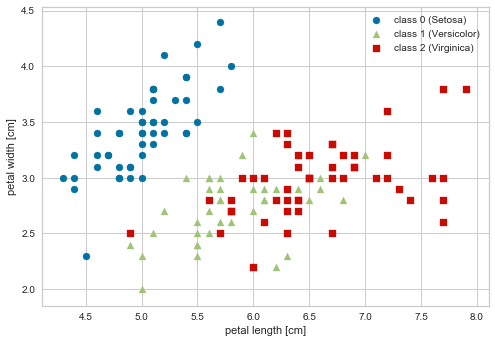

In [129]:
plt.scatter(X[y == 0, 0],
            X[y == 0, 1],
            marker='o',
            label='class 0 (Setosa)')

plt.scatter(X[y == 1, 0],
            X[y == 1, 1],
            marker='^',
            label='class 1 (Versicolor)')

plt.scatter(X[y == 2, 0],
            X[y == 2, 1],
            marker='s',
            label='class 2 (Virginica)')

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='best')

plt.show()

Para implementar el método inicialmente hacemos la partición en valores de entrenamiento y valores de validación.

In [140]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

Para implementar el método importamos la librería y en este caso utilizaremos los 4 vecinos mas cercanos.

In [141]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

Para predecir con los valores de validación se utiliza.

In [142]:
y_pred=knn.predict(X_test)
y_pred[:10]

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2])

Para obtener la probabilidad de cada clase se utiliza la función proba:

In [143]:
prediction_proba=knn.predict_proba(X_test)
prediction_proba[:10,:]

array([[1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.75, 0.25],
       [0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  ]])

Para obtener la precisión se puede utilizar la función *score*.

In [144]:
print(knn.score(X_test,y_test))

1.0


Utilizando la partición *kfold Shuffle* para los valores de entrenamiento obtenemos los siguientes resultados:

In [145]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
kfold = ShuffleSplit(n_splits=5)
results = cross_val_score(knn, X_train, y_train, cv=kfold)
print(results.mean())
print(results.std())

0.95
0.04082482904638632


A continuación se presentan otras métricas para evaluar los resultados, comparando entre los datos de entrenamiento y los datos de validación, para lo cual predecimos y con los valores de entrenamiento.

In [146]:
y_train_pred=knn.predict(X_train)
from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_pred))
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.92      0.95      0.93        37
           2       0.95      0.93      0.94        44

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [147]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train,y_train_pred))
print(confusion_matrix(y_test,y_pred))

[[39  0  0]
 [ 0 35  2]
 [ 0  3 41]]
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [149]:
from sklearn.metrics import accuracy_score 
print('Precision para entrenamiento:',accuracy_score(y_train,y_train_pred))
print('Precision para validacion:',accuracy_score(y_test,y_pred))

Precision para entrenamiento: 0.9583333333333334
Precision para validacion: 1.0


Como se puede observar en la implementacion de KNN, existen tres hiperparámetros que deben evaluarse. Uno de los hiperparámetros importantes es el número K. A continuación se utilizará la curva de validación para determinar el valor de K óptimo.

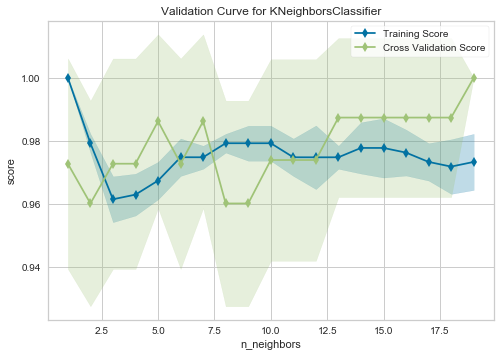

In [150]:
from yellowbrick.model_selection import ValidationCurve
param_range=np.arange(1,20)
k=ValidationCurve(KNeighborsClassifier(),param_name='n_neighbors', param_range=param_range, cv=kfold, scoring='f1_weighted',n_jobs=4)
k.fit(X,y)
k.show();

Un K de 8 presenta resultados ligeramente mejores. Gráficamente los resultados se observan de la siguiente manera:

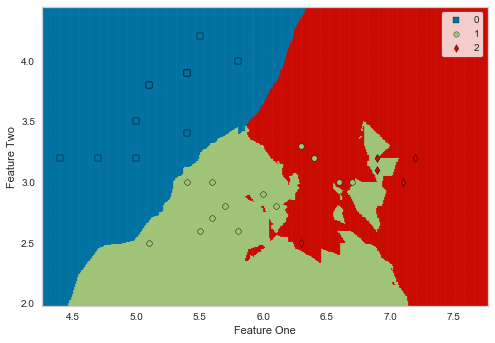

In [151]:
from yellowbrick.contrib.classifier import DecisionViz
viz=DecisionViz(KNeighborsClassifier(8))
viz.fit(X_train[:,:2], y_train)
viz.draw(X_test[:,:2],y_test)
viz.show();

Para seleccionar los mejores hiperparametros simultaneamente se puede utilizar el metodo *gridsearch*. Inicialmente se crea una lista con el rango de valores que se desea evalaur para cada hiperparámetro. en este caso evaluaremos *leaf_size*, n_neighbors* y *p*. La distancia Minkowski es utilizada por defecto, la cual corresponde a una generalizacion de la distancia Euclidiana (para variables que esten en la misma escala) o la distancia Manhattan (cuando las variables difieran en sus escalas).

In [152]:
#Hiperparametros a evaluar.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,10))
p=[1,2]

#Realizar un diccionario con los valores a evaluar.
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

In [153]:
from sklearn.model_selection import GridSearchCV
knn_2 = KNeighborsClassifier()
clf = GridSearchCV(knn_2, hyperparameters, cv=kfold)
best_model = clf.fit(X_train,y_train)
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 2
Best n_neighbors: 7


In [154]:
knn_best=KNeighborsClassifier(n_neighbors=7, leaf_size=1, p=2)
knn_best.fit(X_train,y_train)
y_pred=knn_best.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


Existe tambien un algoritmo de KNN para regresión, el cual funciona de la siguiente forma:

In [155]:
from sklearn.datasets import load_boston
X,y=load_boston(return_X_y=True)

In [157]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
kfold = ShuffleSplit(n_splits=5)
model = KNeighborsRegressor()
results = cross_val_score(model, X, y, cv=kfold)
print(results.mean())
print(results.std())

0.5290536583535111
0.09770217915831308
